# <font color='red'><b>Bootstrap assignment</b> </font>

<font color='blue'> <b>Importing packages</b> </font>

In [37]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
import warnings
warnings.filterwarnings("ignore")

In [38]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [39]:
x.shape


(506, 13)

In [164]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [165]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/OfcFrUP.jpg/)

*  <font color='blue'><b> code for generating samples</b></font>

In [166]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    

    # return sampled_input_data , sampled_target_data,selected_rows,selected_columns
    #note please return as lists
    
    sample_rows= np.random.choice(x.shape[0],303,replace = False)
    replacing_rows= np.random.choice(sample_rows,203,replace = False)
    
    col = np.random.randint(3, 13, size = 1)
    selected_col = np.random.choice(range(13), size = col, replace = False)
    
    
    sample_data = input_data[sample_rows[:, None], selected_col]
    target_sample_data = target_data[sample_rows]
    
    replic_data= input_data[replacing_rows[:, None], selected_col]
    target_replic_data = target_data[replacing_rows]
    
    #concatenation
    
    f_sample_data = np.vstack((sample_data,replic_data))
    f_target_sample_data = np.vstack((target_sample_data.reshape(-1,1),target_replic_data.reshape(-1,1)))
    
    #returnimg list after conversio from ndarray
    return f_sample_data.tolist(),f_target_sample_data.tolist(),sample_rows.tolist(),selected_col.tolist()

In [167]:
#a,b,c,d=generating_samples(x,y)
#print(len(a),len(b),len(c),len(d))

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [168]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [169]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list

def get_sample_lists(x, y):
    list_input_data = []
    list_output_data = []
    list_selected_row = []
    list_selected_columns = []

    for i in range(0, 30):
        a, b, c, d = generating_samples(x, y)
        list_input_data.append(a)
        list_output_data.append(b)
        list_selected_row.append(c)
        list_selected_columns.append(d)
    return list_input_data, list_output_data, list_selected_row, list_selected_columns

In [170]:
list_input_data, list_output_data, list_selected_row, list_selected_columns = get_sample_lists(x, y)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [171]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> code for building regression trees</b></font>

In [172]:
from sklearn.tree import DecisionTreeRegressor

def model_train(list_input_data, list_output_data):
    list_models_dt = []
    for i in range(0, 30):
        clf =  DecisionTreeRegressor(max_depth=None)
        clf.fit(list_input_data[i], list_output_data[i])
        list_models_dt.append(clf)
    return list_models_dt

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> code for calculating MSE</b></font>

In [173]:
def mse_score(x,model,selected_columns):
    y_pred_for_mse = []

    for i in x:
        y_pred = []

        for j in range(len(model)):
            y_pred.append(model[j].predict(i[selected_columns[j]].reshape(1,-1)))
        y_pred_for_mse.append(np.median(np.asarray(y_pred)))
    
    mse = mean_squared_error(y,np.asarray(y_pred_for_mse))
    return mse

In [174]:
selected_models = model_train(list_input_data, list_output_data)

In [175]:
mse = mse_score(x, selected_models, list_selected_columns)
print(mse)

0.036758893280632456


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> code for calculating OOB score </b></font>

In [176]:
def oob_score(x,model,selected_columns,selected_rows):
    y_pred_for_oob=[]

    for i in range(len(x)):
        p=x[i]
        y_pred =[]

        for j in range(len(model)):
            if i not in selected_rows[j]:
                y_pred.append(model[j].predict(p[selected_columns[j]].reshape(1,-1)))
        y_pred_for_oob.append(np.median(np.asarray(y_pred)))
    oob = mean_squared_error(y,np.asarray(y_pred_for_oob))
    return oob

In [178]:
oob = oob_score(x, selected_models, list_selected_columns, list_selected_row)
print(oob)

14.007294250445527


# <font color='blue'><b>Task 2</b></font>

In [179]:
list_input_data =[]
list_output_data =[]
list_selected_rows =[]
list_selected_columns =[]

mse_val = []
oob_val = []

for i in range(0,35):        # Building Random forest model 35 times 
    list_input_data, list_output_data, list_selected_row, list_selected_columns = get_sample_lists(x, y)
    selected_models = model_train(list_input_data, list_output_data)
    mse = mse_score(x, selected_models, list_selected_columns)
    mse_val.append(mse)
    oob = oob_score(x, selected_models, list_selected_columns, list_selected_row)
    oob_val.append(oob)
    


In [180]:
mse_val

[0.1464720575318402,
 0.19576049011857719,
 0.060469367588932815,
 0.040938357762406674,
 0.04596837944664034,
 0.03058794466403162,
 0.13138618308690775,
 0.10532114624505931,
 0.12144268774703552,
 0.10395503952569171,
 0.1111107383917231,
 0.09329051383399212,
 0.0441205533596838,
 0.0871195652173913,
 0.0495306324110672,
 0.06100914031620552,
 0.06281126482213445,
 0.05840910326086954,
 0.0938885375494072,
 0.0660006203794655,
 0.02333498023715414,
 0.03975582722663213,
 0.0774910621318248,
 0.14979743083003952,
 0.0789624855124437,
 0.11544584980237152,
 0.014145256916996014,
 0.0618666282389108,
 0.09426510348045687,
 0.08124011857707508,
 0.17202459376372417,
 0.07198122529644263,
 0.1914229249011858,
 0.06355864826167623,
 0.033651185770751026]

In [188]:
oob_val

[16.829961488618096,
 15.336719321432636,
 12.592025691699604,
 13.736543675889328,
 11.48066480017567,
 13.183300395256913,
 16.640839994247038,
 13.085318800141941,
 14.226027667984187,
 12.733636363636363,
 13.721702600076828,
 12.674035951910406,
 13.104525691699603,
 14.50334170509442,
 15.409942853109623,
 17.957264761747915,
 14.59133732372306,
 17.35173931615444,
 10.618763806267348,
 13.412639575098815,
 14.941107031411423,
 15.03581392373719,
 13.192415606763047,
 15.905203377883051,
 13.850888349497229,
 14.653956102542011,
 14.512850790513832,
 13.185984111338449,
 15.463389902428638,
 11.479362648221342,
 14.238447388279962,
 11.950198360335987,
 13.23825098814229,
 15.061042372469041,
 14.98338932806324]

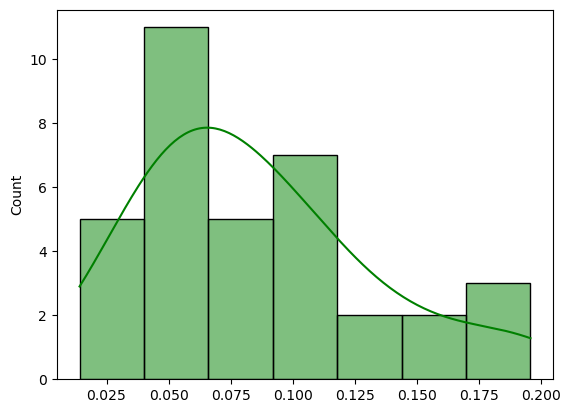

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig, axs = plt.subplot(1,2)
sns.histplot(mse_val, color='g',kde=True)

plt.show()

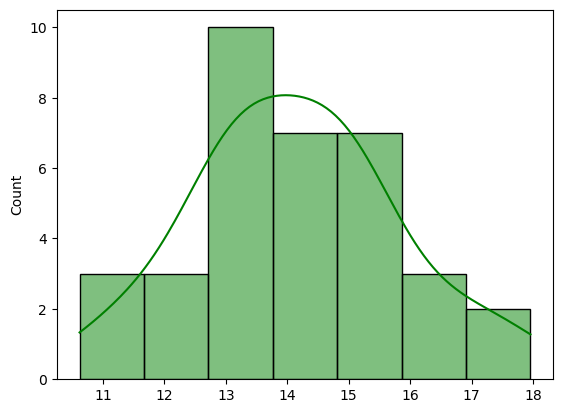

In [214]:
sns.histplot(oob_val, color='g',kde=True)
plt.show()

In [224]:
#import scipy.stats as st
#
#st.t.interval(alpha=0.95, df=len(mse_val)-1,
#              loc=np.mean(mse_val),
#              scale=st.sem(mse_val))

In [241]:
print("There is 95% confidence that OOB value lies in the interval of [{},{}]".format(np.percentile(oob_val,2.5),np.percentile(oob_val,97.5)))

There is 95% confidence that OOB value lies in the interval of [11.350272821928243,17.44256813299346]


In [242]:
print("There is 95% confidence that mean squared error lies in the interval of [{},{}]".format(np.percentile(mse_val,2.5),np.percentile(mse_val,97.5)))

There is 95% confidence that mean squared error lies in the interval of [0.02195652173913042,0.1920735596837945]


In [243]:
print("Observed MSE:{} \n\n Observed OOB:{}".format(mse,oob))

Observed MSE:0.033651185770751026 

 Observed OOB:14.98338932806324


In [225]:
#from scipy.stats import normaltest
#
#k2, p = normaltest(mse_val)
#print(p)
#

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b>code for TASK 3 </b></font>

In [327]:
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
xq = np.array(xq).reshape(1,-1)
xq.shape

(1, 13)

In [367]:
def pred(xq,model,selected_columns):
    #y_pred_val = []

    #for i in x:
    y_pred = []

    for j in range(len(model)):
        y_pred.append(model[j].predict(xq[0][selected_columns[j]].reshape(1,-1)))
        #y_pred_val.append(np.median(np.asarray(y_pred)))
    y_pred_val = np.median(np.asarray(y_pred))
    return y_pred_val

In [368]:
selected_models = model_train(list_input_data, list_output_data)

In [371]:
xq[0][[12,11]]#.reshape(1,-1)

array([ 18.6 , 372.13])

In [370]:
val = pred(xq, selected_models, list_selected_columns)
print(val)

18.6


<br><br><br>

<font color='red'><b>observations for task 1, task 2, task 3</b></font>

<b> 1. MSE and OOB values obtained were 0.036758893280632456 & 14.007294250445527<br>
 2. 95% confidence interval of mean squared error & OOB is [0.02195652173913042,0.1920735596837945] ,[11.350272821928243,17.44256813299346]<br>
 3. Both MSE and OOB observed value lies within the 95 percentile value although MSE lies at the edge meaning if the significance value is not 5%(i.e not 95% CI) then MSE will fail above the 5% significance.
* This might be because we have sampled or ran Random forest only 35 times , if that number increases then result might get improved